### CSAI 801 Project: COVID-19 Outcome Prediction
` this dataset to measure `
#### columns 
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, classification_report
warnings.filterwarnings("ignore")

In [29]:
# helper methods 
def predict_and_score(clf,X, y):
    """
        clf: model 
        X: X_train data 
        y: label data
        return precision, recall, F1, roc_auc
    """
    y_predict = clf.predict(X)
    precision= precision_score(y, y_predict)
    recall = recall_score(y,y_predict)
    roc_auc = roc_auc_score(y, y_predict)
    F1 = f1_score(y, y_predict)
    return precision, recall, F1, roc_auc

def draw_roc_curve(clf,X_test,y_test):
    y_predict =  clf.predict_proba(X_test)
    y_pred_proba = y_predict[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [30]:
df = pd.read_csv("data.csv")

In [31]:
df = df.iloc[:,1:]
data = df.copy()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [33]:
df.isna().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

In [34]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [35]:
df['gender'].unique()

array([1, 0, 2], dtype=int64)

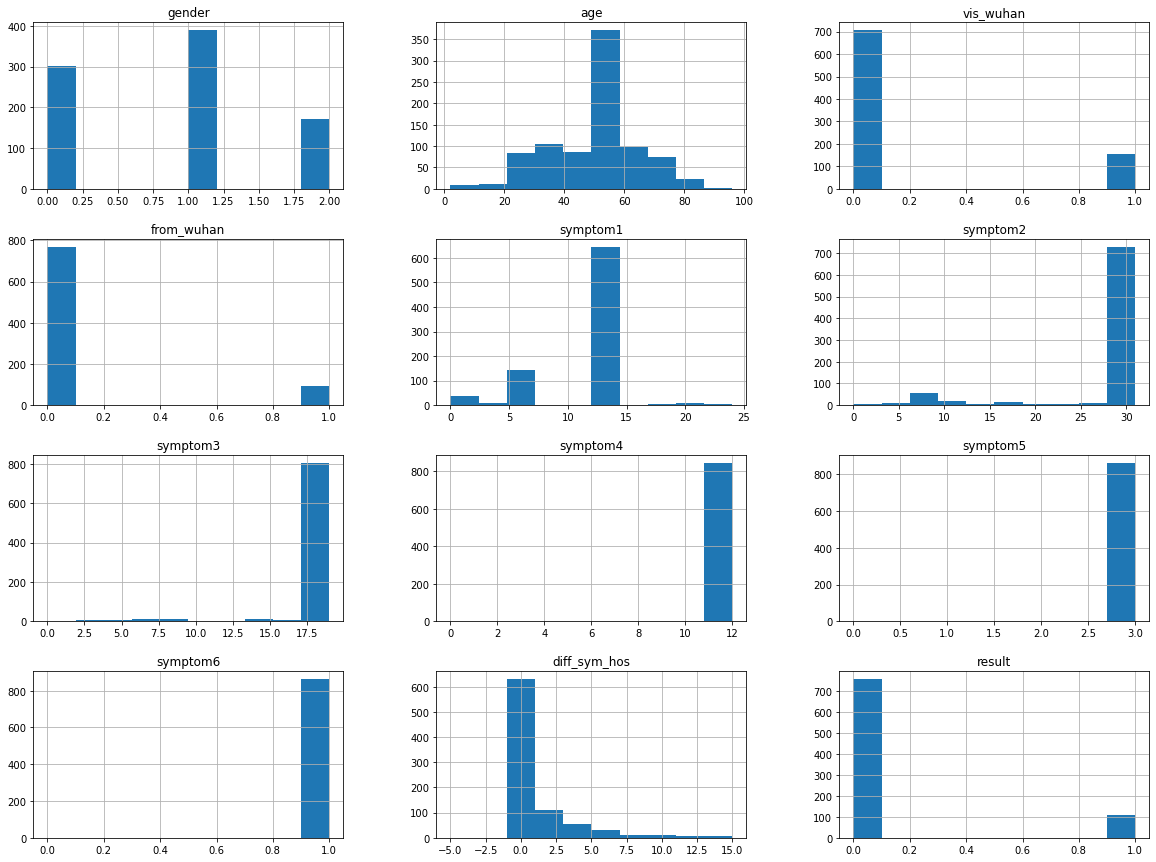

In [36]:
df.iloc[:,2:].hist( figsize=(20, 15));

In [37]:
df.columns

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos', 'result'],
      dtype='object')

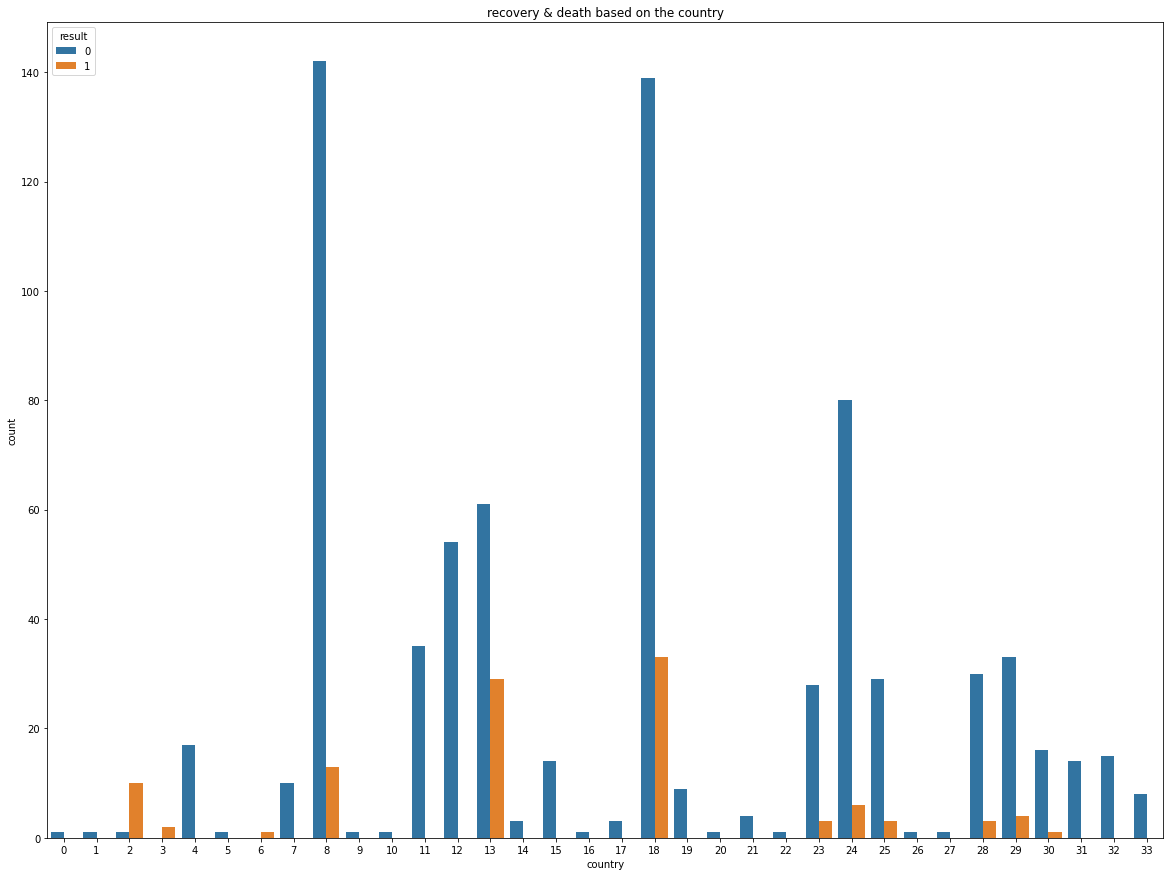

In [38]:
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x= "country", hue= "result", data= df);
ax.set_title("recovery & death based on the country");

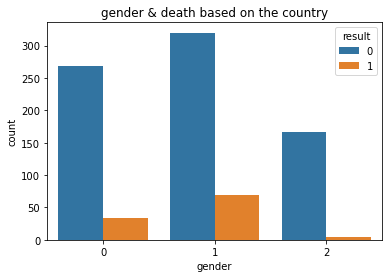

In [39]:
ax = sns.countplot(x= "gender", hue= "result", data= df);
ax.set_title("gender & death based on the country");

In [40]:
df["age"].min(), df["age"].max()

(2.0, 96.0)

In [41]:
age_ranges = np.arange(df['age'].min(), df["age"].max(), 10)
age_labels =  [f">={age_ranges[i-1]}" for i in range(1,age_ranges.shape[0])]
age_ranges.shape, len(age_labels)

((10,), 9)

In [42]:
df["age_label"] = pd.cut(df["age"], bins= age_ranges,labels= age_labels)

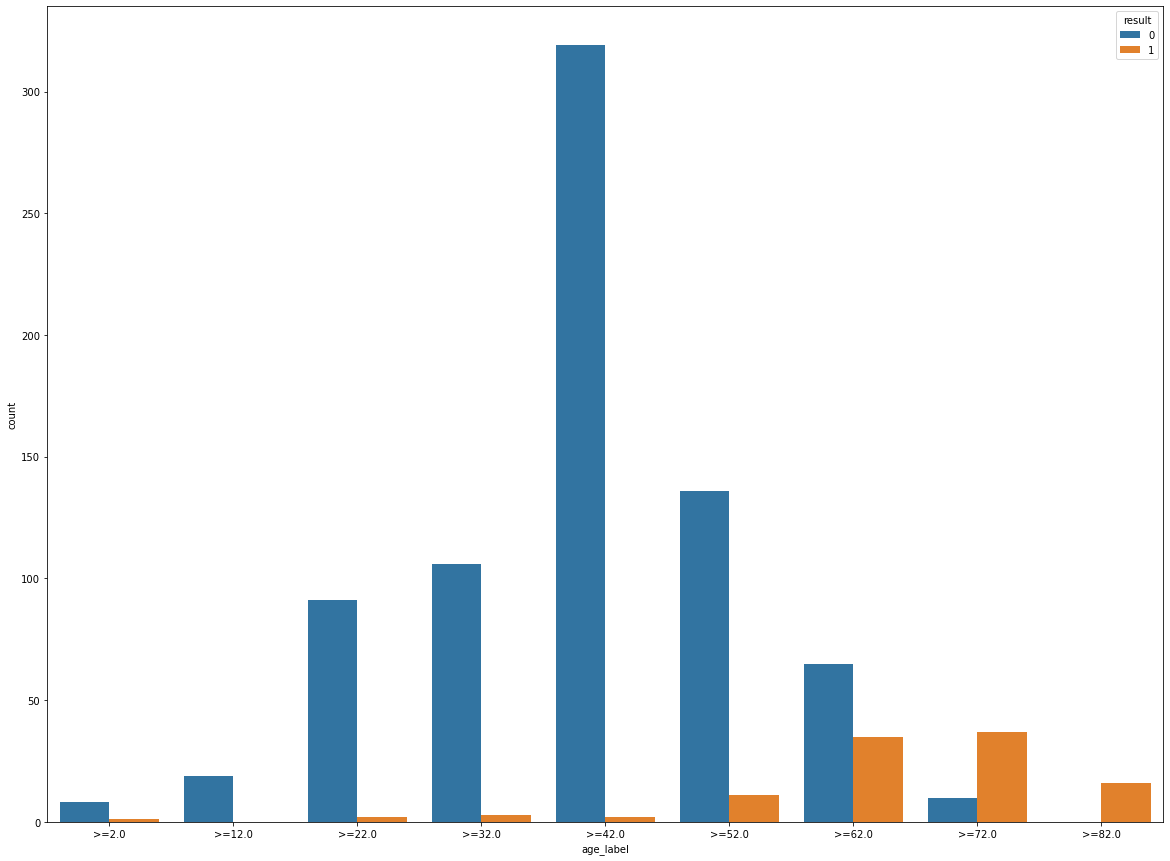

In [43]:
fig = plt.figure(figsize=(20, 15))
sns.countplot(x="age_label", hue= "result", data= df)
ax.set_title("recovery & death based on the country");

In [44]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,age_label
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1,>=62.0
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0,>=52.0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0,>=42.0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0,>=52.0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0,>=52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1,>=22.0
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0,>=32.0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0,>=42.0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0,>=42.0


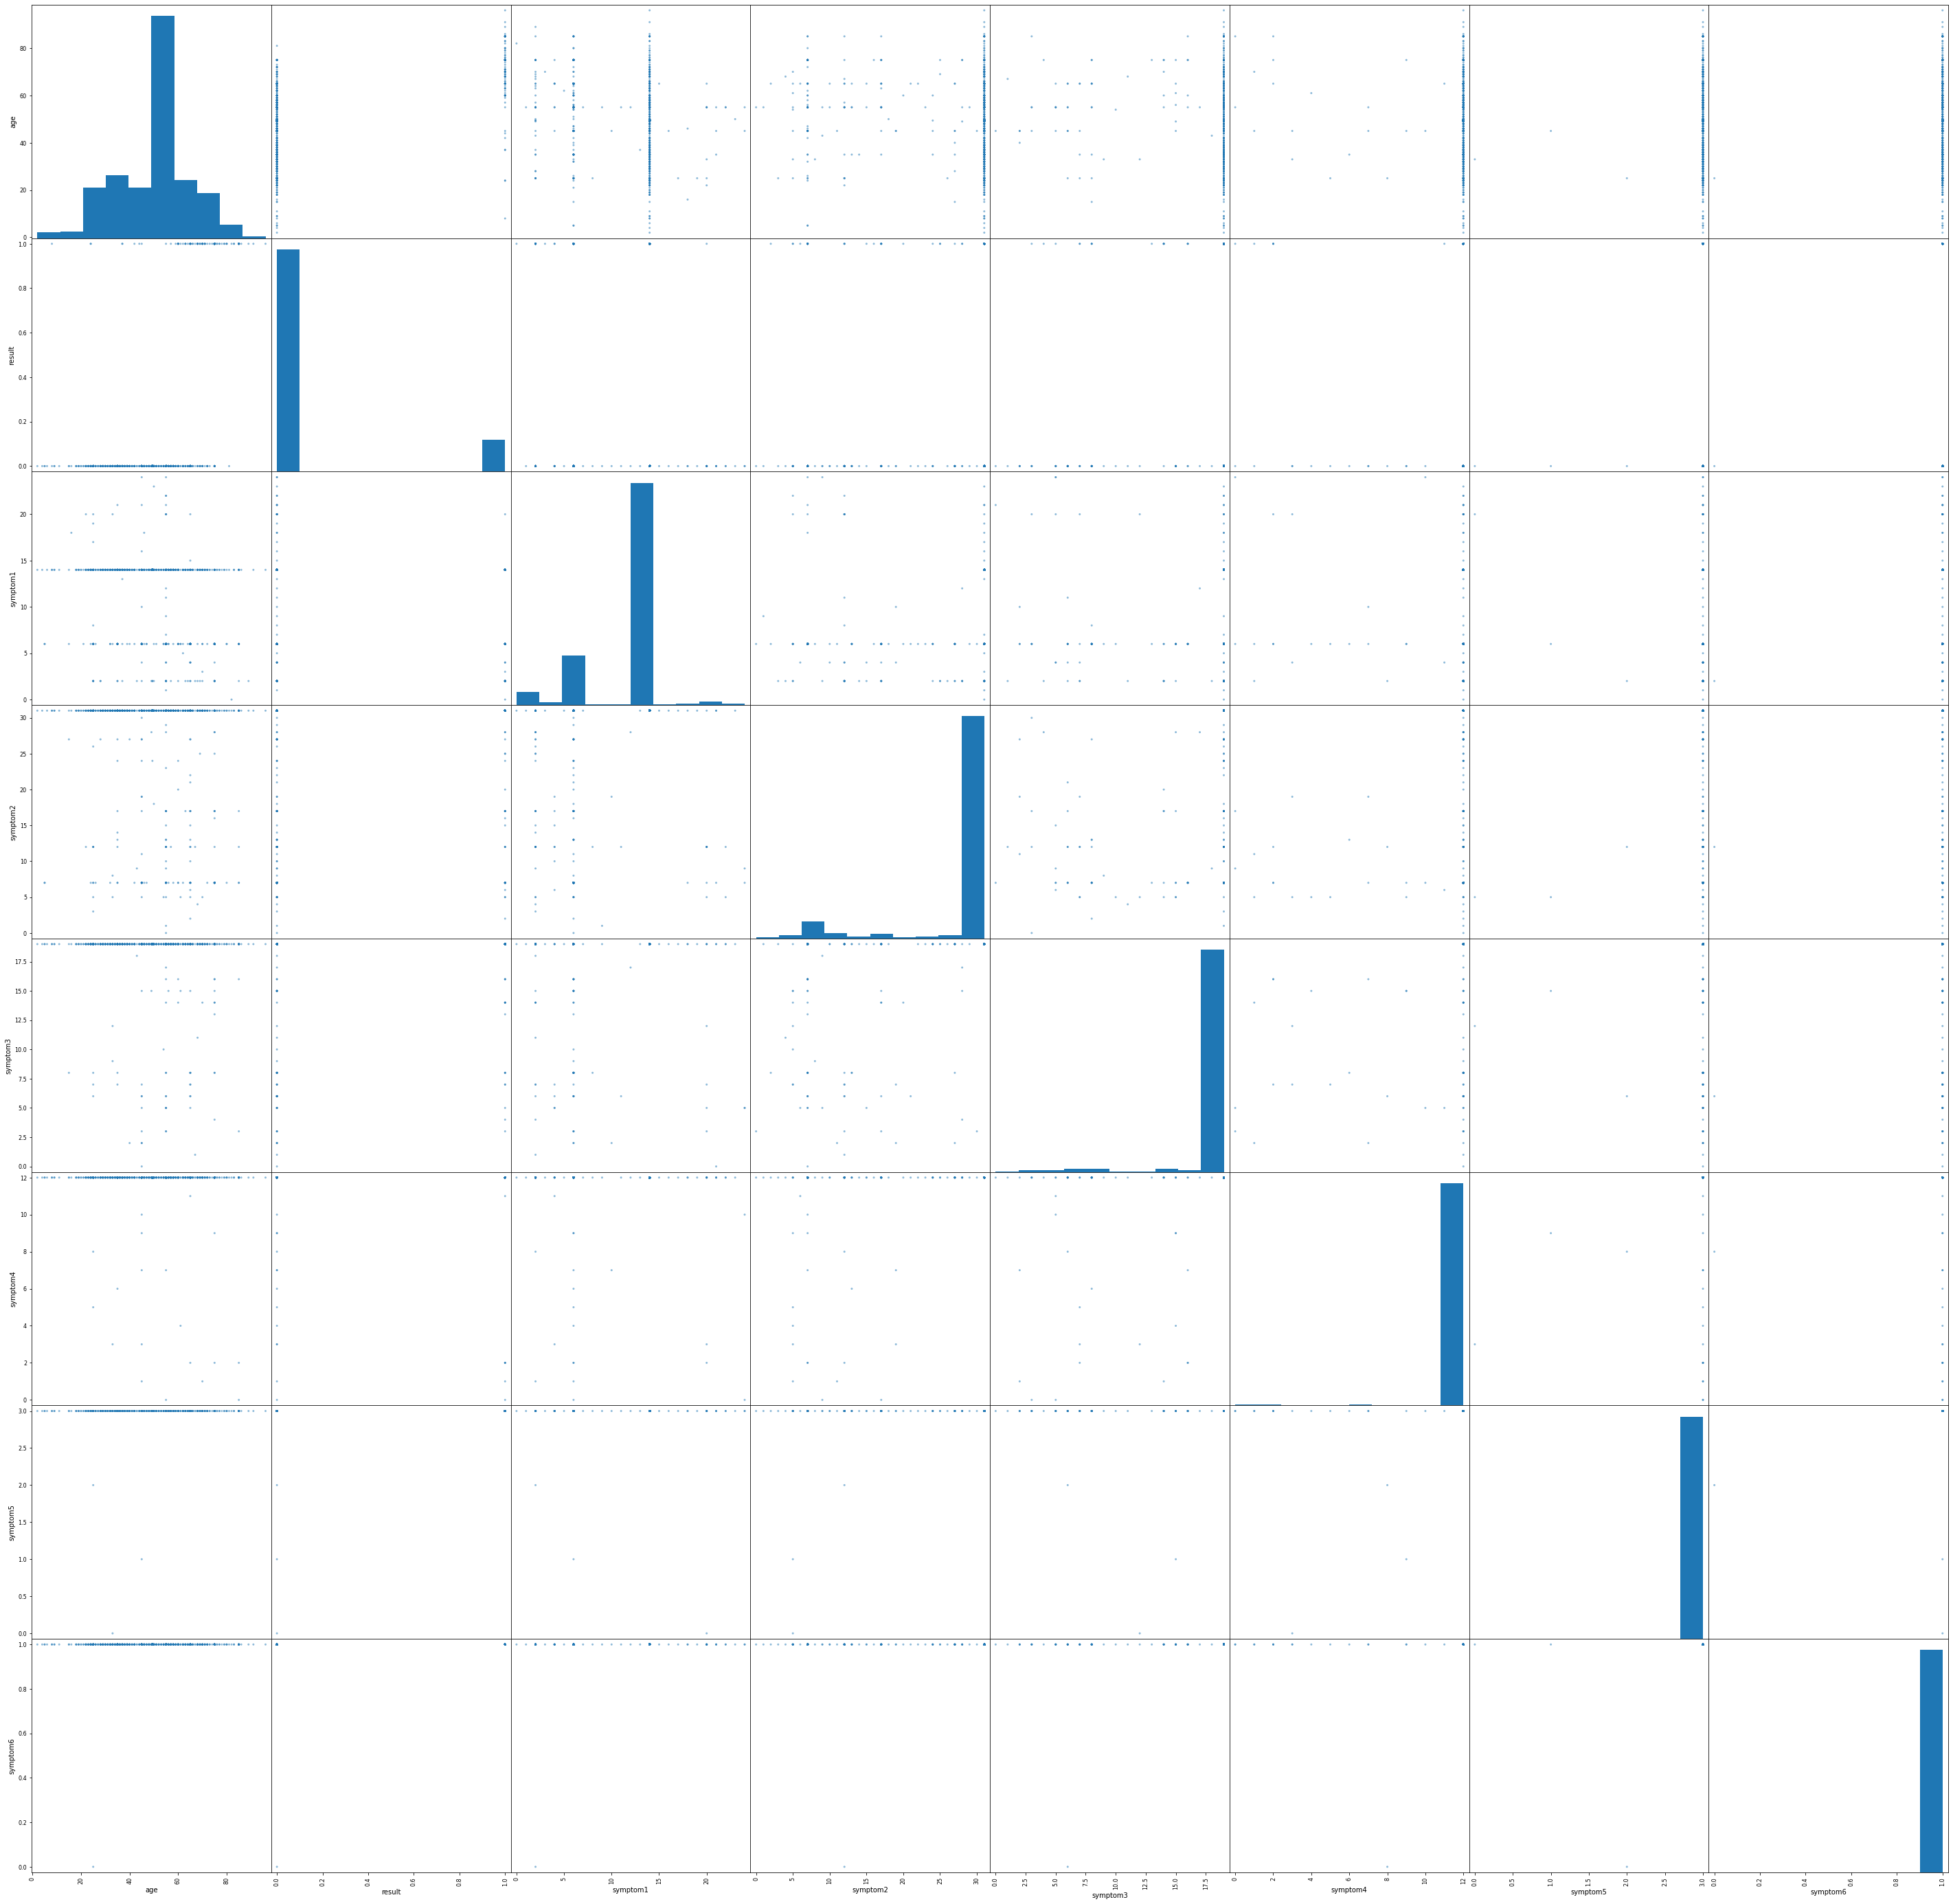

In [45]:
pd.plotting.scatter_matrix(df[["age", "result"] + symptom_fileds], figsize= (50, 50));

In [46]:
data.iloc[:,2:-2]

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,66.0,1,0,14,31,19,12,3,1
1,0,56.0,0,1,14,31,19,12,3,1
2,1,46.0,0,1,14,31,19,12,3,1
3,0,60.0,1,0,14,31,19,12,3,1
4,1,58.0,0,0,14,31,19,12,3,1
...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1
859,2,35.0,0,0,14,31,19,12,3,1
860,1,49.4,0,0,14,31,19,12,3,1
861,1,49.4,0,0,14,31,19,12,3,1


In [47]:
X = data.iloc[:,:-2]
y = data.iloc[:,-2:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
symptom_fileds = [col for col in df.columns if "symptom" in col]
len(symptom_fileds)

6

In [49]:
ax = sns.countplot(x= symptom, hue= "result", data= df);
ax.set_title("gender & death based on the country");

NameError: name 'symptom' is not defined

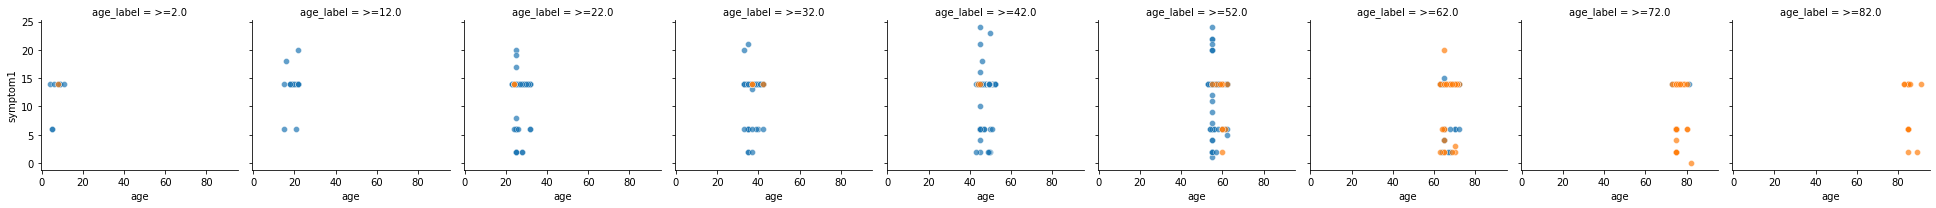

In [50]:
g = sns.FacetGrid(df ,col="age_label", hue="result")
g.map(sns.scatterplot, "age", "symptom1",alpha=.7)

### KNN

In [51]:
model = KNeighborsClassifier(n_neighbors= 4)
model.fit(np.array(X_train), np.array( y_train))

KNeighborsClassifier(n_neighbors=4)

In [52]:
y_predict = model.predict(X_test)

In [53]:
accuracy_score(y_test, y_predict)

0.6833976833976834

In [70]:
confusion_matrix(y_test, y_predict)

NameError: name 'confusion_matrix' is not defined

In [71]:
f1_score(y_test, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [86, 259]

In [72]:
precision_score(y_test, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [86, 259]

In [73]:
recall_score(y_test, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [86, 259]

In [74]:
precision, recall, threshold = precision_recall_curve(y_test, y_predict)

ValueError: multiclass format is not supported

In [75]:
threshold

NameError: name 'threshold' is not defined

In [76]:
predict_and_score(model, X_test, y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

***

In [61]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    return predict_and_score(clf, X_test, y_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import  precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve
warnings.filterwarnings("ignore")

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5,shuffle=True, random_state=42)

In [64]:
dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
weights = ['distance', 'uniform']
for k in range(1, int(len(X_train) ** 0.5), 2):
    for weight in weights: 
        knn = KNeighborsClassifier(n_neighbors=k, weights= weight)
        knn.fit(X_train, y_train)
        precision, recall, roc_auc, F1 = predict_and_score(knn, X_validate, y_validate)
        dic['clf'].append(knn)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
knn_result = pd.DataFrame(dic)
best_knn_classifier =  knn_result.iloc[knn_result['recall'].idxmax(), 0]

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [77]:
# use the best classifier 
precision, recall, roc_auc, F1 = train_test(best_knn_classifier, X_train, X_test, y_train, y_test)

NameError: name 'best_knn_classifier' is not defined

In [66]:
draw_roc_curve(best_knn_classifier, X_test, y_test)

NameError: name 'best_knn_classifier' is not defined

In [67]:
knn_result['recall'] 

NameError: name 'knn_result' is not defined

***

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state=3)

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

NameError: name 'confusion_matrix' is not defined